In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib import pyplot as plt
import seaborn as sns
import eli5

In [3]:
df = pd.read_csv('QueryResults.csv')

df.head()

Title  \
0  Android Studio : "Could not get unknown proper...   
1  How to mock history.push with the new React Ro...   
2             C#: Converting List of Chars to String   
3  Implementing efficient audit trail of record c...   
4  How to change the number of rows in the textar...   

                                                Body  \
0  <p>I am a newbie with Android Studio. I am try...   
1  <p>I am trying to mock <code>history.push</cod...   
2  <p>I'm solving a coding challenge on Coderbyte...   
3  <p>I have a quite common design problem: I nee...   
4  <p>I have a textarea with 5 lines. I want to s...   

                                                Tags        Id  Score  \
0  <java><android><android-studio><gradle><androi...  40420705      6   
1  <reactjs><react-router><jestjs><react-router-d...  58524183     53   
2                                       <c#><string>  58524222     14   
3  <python><performance><google-app-engine><audit...   4417130      6   
4      <javascript><jquery><textarea><jquery-events>   4417161     21   

   ViewCount  FavoriteCount  AnswerCount  
0      51645            0.0            3  
1      60110            0.0            3  
2      30960            NaN            1  
3       2075            0.0            1  
4      32115            0.0            3

In [11]:
yi = df["Tags"].str.lstrip('<').str.replace('<', ' ').str.replace('>', '')

from collections import Counter
Counter(yi).most_common(100)

[('python', 173),
 ('javascript', 171),
 ('c#', 165),
 ('c++', 139),
 ('html css', 134),
 ('java', 132),
 ('javascript jquery', 131),
 ('php', 107),
 ('c# .net', 101),
 ('android', 100),
 ('jquery', 95),
 ('git', 90),
 ('mysql', 77),
 ('css', 67),
 ('c', 67),
 ('r', 65),
 ('ruby', 56),
 ('asp.net-mvc', 56),
 ('python django', 55),
 ('sql sql-server', 52),
 ('ruby-on-rails', 52),
 ('ruby-on-rails ruby', 49),
 ('sql-server', 49),
 ('python pandas', 48),
 ('vim', 47),
 ('svn', 43),
 ('asp.net', 42),
 ('angular', 41),
 ('regex', 40),
 ('sql sql-server tsql', 39),
 ('c# linq', 39),
 ('javascript jquery html', 37),
 ('powershell', 36),
 ('sql mysql', 36),
 ('iphone', 36),
 ('visual-studio', 35),
 ('html', 35),
 ('django', 34),
 ('angularjs', 33),
 ('typescript', 33),
 ('iphone cocoa-touch', 33),
 ('perl', 33),
 ('r ggplot2', 31),
 ('go', 31),
 ('sql', 29),
 ('java multithreading', 29),
 ('scala', 29),
 ('c++ c++11', 29),
 ('python list', 29),
 ('javascript html', 29),
 ('postgresql', 28),
 (

In [17]:
yt = df["Tags"].str.lstrip('<').str.replace('<', ' ').str.replace('>', '')

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(yt)


mlb.classes_

array([' ', '#', '+', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y', 'z'], dtype=object)

In [20]:
X = df["Title"]
y = df["Tags"].str.lstrip('<').str.replace('<', ' ').str.replace('>', '')
X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [21]:
Counter(y_train).most_common(100)

[('python', 132),
 ('c#', 123),
 ('javascript', 121),
 ('c++', 109),
 ('html css', 103),
 ('javascript jquery', 98),
 ('java', 96),
 ('php', 76),
 ('git', 75),
 ('android', 74),
 ('jquery', 74),
 ('c# .net', 69),
 ('mysql', 63),
 ('css', 49),
 ('r', 49),
 ('c', 49),
 ('python django', 46),
 ('asp.net-mvc', 42),
 ('ruby-on-rails ruby', 39),
 ('sql-server', 38),
 ('ruby-on-rails', 38),
 ('ruby', 37),
 ('python pandas', 36),
 ('vim', 35),
 ('sql sql-server', 34),
 ('asp.net', 33),
 ('angular', 31),
 ('visual-studio', 30),
 ('perl', 30),
 ('c# linq', 29),
 ('sql sql-server tsql', 28),
 ('regex', 28),
 ('svn', 28),
 ('sql mysql', 27),
 ('iphone', 27),
 ('django', 26),
 ('javascript jquery html', 25),
 ('r ggplot2', 25),
 ('iphone cocoa-touch', 24),
 ('typescript', 24),
 ('powershell', 23),
 ('go', 23),
 ('python list', 23),
 ('java multithreading', 23),
 ('c# asp.net', 22),
 ('angularjs', 22),
 ('html', 22),
 ('postgresql', 22),
 ('javascript html', 21),
 ('scala', 21),
 ('php mysql', 21),


In [25]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(y_train)


mlb

MultiLabelBinarizer()

In [28]:
y_train.head(15)

27434               gmail syntax-highlighting highlighting
13400                                      google-bigquery
883                        design-patterns database-design
7303                                          c# .net smtp
45124                                   iphone objective-c
874                             asp.net vb.net file-io csv
45943                                     c++ return-value
11458                                 unit-testing mocking
23877                                 python introspection
11                curl cors google-chrome-devtools postman
27813    machine-learning neural-network deep-learning ...
10713      php mysql database image-processing file-upload
46014            android animation android-canvas waveform
3645                                     c# .net pdb-files
10448                    ios objective-c iphone ipod-touch
Name: Tags, dtype: object

In [29]:
genre = mlb.inverse_transform(y_train)
genre

IndexError: tuple index out of range

In [51]:
y_train.shape

(37500,)

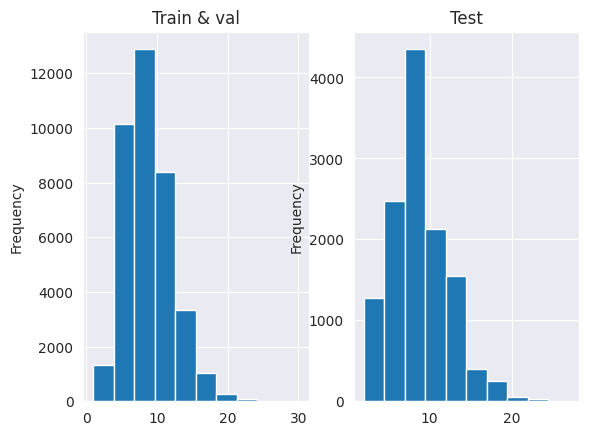

In [52]:
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
X_train.apply(lambda x: len(x.split())).plot(kind='hist')
# plt.yscale('log');
plt.title('Train & val')
plt.subplot(1, 2, 2)
X_test.apply(lambda x: len(x.split())).plot(kind='hist')
# plt.yscale('log');
plt.title('Test');

In [53]:
# sns.countplot(y_train)
# plt.title('Train+val: Target distribution')

In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=800,
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask); #wordcloud
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

plot_wordcloud(X_train, title="Word Cloud of reviews")

In [55]:
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

In [56]:
%%time
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

CPU times: user 1.91 s, sys: 27.3 ms, total: 1.94 s
Wall time: 2.65 s


In [57]:
X_train_text.shape, X_test_text.shape

((37500, 139164), (12500, 139164))

In [58]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)

In [59]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [60]:
%%time
# cv_results = cross_val_score(logit, X_train_text, y_train, cv=5, scoring='f1_micro')
# cv_results = cross_val_score(logit, X_train_text, y_train, cv=skf, scoring='f1_micro')

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11 µs


In [61]:
# cv_results, cv_results.mean()

In [64]:
# %%time
logit.fit(X_train_text, y_train)

MemoryError: Unable to allocate 31.3 GiB for an array with shape (30147, 139165) and data type float64

In [63]:
eli5.show_weights(estimator=logit,
                  feature_names= list(text_transformer.get_feature_names_out()),
                 top=(50, 5))

ValueError: Can't figure out feature vector size for LogisticRegression(C=50.0, multi_class='multinomial', n_jobs=4, random_state=17)

In [ ]:
test_preds = logit.predict(X_test_text)

In [ ]:
pd.DataFrame(test_preds, columns=['label']).head()

In [ ]:
# https://www.kaggle.com/code/sudhirnl7/logistic-regression-tfidf/notebook
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc
col = 'identity_hate'
print("Column:",col)
# pred_pro = lr.predict_proba(X)[:,1] # log reg
# frp,trp,thres = roc_curve(y[col],pred_pro) # import
# auc_val =auc(frp,trp)
# plt.figure(figsize=(14,10))
# plt.plot([0,1],[0,1],color='b')
# plt.plot(frp,trp,color='r',label= 'AUC = %.2f'%auc_val)
# plt.legend(loc='lower right')
# plt.xlabel('True positive rate')
# plt.ylabel('False positive rate')
# plt.title('Reciever Operating Characteristic')

In [ ]:
import os
os.environ['OMP_NUM_THREADS'] = '4'

In [ ]:
# col = 'identity_hate'
# print("Column:",col)
# pred =  lr.predict(X)
# print('\nConfusion matrix\n',confusion_matrix(y[col],pred))
# print(classification_report(y[col],pred))

In [ ]:
# shap
# https://h1ros.github.io/posts/sentiment-analysis-by-shap-with-logistic-regression/

# explainer = shap.LinearExplainer(reg,
#                                  X_train,
#                                  feature_dependence="independent")

In [ ]:
# for count vect + transformers

# https://github.com/kavgan/nlp-in-practice/blob/master/tf-idf/Keyword%20Extraction%20with%20TF-IDF%20and%20SKlearn.ipynb

In [ ]:
df['Tags'].value_counts().plot(kind='bar')

<AxesSubplot: >